Chest X-Ray Image Classification

## Importing Libraries and Loading Images

### Libraries

In [1]:
#Import necessary libraries
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("darkgrid")
import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img
import os

### Load Images

In [2]:
#Directory path
train_data_dir = 'chest_xray/train/'
test_data_dir = 'chest_xray/test/'
val_data_dir = 'chest_xray/val/'

In [3]:
#Get all the data in each generator and reshaping the images
train_generator = ImageDataGenerator().flow_from_directory(
        train_data_dir, 
        target_size=(128, 128), 
        color_mode = 'grayscale',
        batch_size=500)

test_generator = ImageDataGenerator().flow_from_directory(
        test_data_dir, 
        target_size=(128, 128), 
        color_mode = 'grayscale',
        batch_size=125)

val_generator = ImageDataGenerator().flow_from_directory(
        val_data_dir, 
        target_size=(128, 128), 
        color_mode = 'grayscale',
        batch_size=8)

Found 5216 images belonging to 2 classes.
Found 624 images belonging to 2 classes.
Found 16 images belonging to 2 classes.


In [4]:
#Create the datasets
train_images, train_labels = next(train_generator)
test_images, test_labels = next(test_generator)
val_images, val_labels = next(val_generator)

### Previewing Images

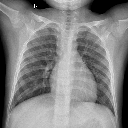

In [5]:
array_to_img(train_images[10])

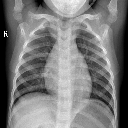

In [6]:
array_to_img(train_images[72])

## Images and Labels

In [7]:
#Taking a look at how the numpy arrays look like
print(np.shape(train_images))
print(np.shape(train_labels))

print(np.shape(test_images))
print(np.shape(test_labels))

print(np.shape(val_images))
print(np.shape(val_labels))

(500, 128, 128, 1)
(500, 2)
(125, 128, 128, 1)
(125, 2)
(8, 128, 128, 1)
(8, 2)


>Images

In [8]:
#Reshaping the images
train_images_unrow = train_images.reshape(500, -1).T
test_images_unrow = test_images.reshape(125, -1).T
val_images_unrow = val_images.reshape(8, -1).T

In [9]:
#Previewing the shape of train_images_unrow
print('Train Images:',np.shape(train_images_unrow))
print('Test Images:',np.shape(test_images_unrow))
print('Validation Images:',np.shape(val_images_unrow))

Train Images: (16384, 500)
Test Images: (16384, 125)
Validation Images: (16384, 8)


>Labels

In [10]:
train_labels

array([[1., 0.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [0., 1.

In [11]:
train_generator.class_indices

{'NORMAL': 0, 'PNEUMONIA': 1}

In [12]:
train_labels_final = train_labels.T[[1]]
test_labels_final = test_labels.T[[1]]
val_labels_final = val_labels.T[[1]]

In [13]:
print('Train Labels:',np.shape(train_labels_final))
print('Test Labels:',np.shape(test_labels_final))
print('Validation Labels:',np.shape(val_labels_final))

Train Labels: (1, 500)
Test Labels: (1, 125)
Validation Labels: (1, 8)


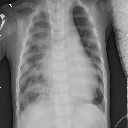

In [14]:
array_to_img(train_images[372])

In [15]:
train_labels_final[:,372]

array([1.], dtype=float32)

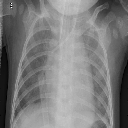

In [16]:
array_to_img(test_images[124])

In [17]:
test_labels_final[:,124]

array([1.], dtype=float32)

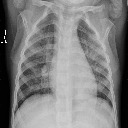

In [18]:
array_to_img(val_images[5])

In [19]:
val_labels_final[:,5]

array([1.], dtype=float32)

Standardizing the Data

In [20]:
train_images_final = train_images_unrow/255
test_images_final = test_images_unrow/255
val_images_final = val_images_unrow/255

type(train_images_unrow)

numpy.ndarray